# Correlation: Finding Trends
It is often useful to infer whether or not random variables are related to each other
via correlation. For example, height and weight are quantities that present positive
correlation for the human population. However, happiness and height are uncorrelated.
There are measures other than correlation to detect similarities among variables, such
as the mutual information, but correlation is simple and yet very useful. But correlation helps to indicate trends such as one quantity increasing when another one decreases.
The correlation C for two complex-valued random variables X and Y is defined as
$C = cor(X, Y) = \mathbb{E}[XY^∗]$,
where $^∗$ denotes the complex conjugate.

Two real-valued random variables are called uncorrelated if, and only if, $cov(X, Y) = 0$,
which is equivalent to
$\mathbb{E}[XY] = \mu_{x}\mu_{y}$.

In [ ]:
#I'd preffer a different introduction, there's not enough space for introducing statistics

## Autocorrelation function
Autocorrelation functions are extension of the correlation concept to signals. There are different definitions for the autocorrelation function, depending on the signal under analysis. In this text, we will focus on the autocorrelation function(ACF) of finite-duration discrete-time signals, though many of the explored ideas can be extrapolated to other definitions.

$$R_X[i] = \sum_{n=i}^{N-1} x[n]x[n-i]$$
As an alternative to use expressions more similar to the ones for signals with infinite
duration, the (unscaled or not normalized) autocorrelation can be expressed as

$$\sum_{n}^{}x[n+i]x^*[n], \quad i = -(N-1), \ldots, -1, 0, 1, \ldots, N-1$$

and computed assuming a zero value for x[n] when its index is out of range. This corresponds to assuming the signal is extended with enough zeros (zero-padding) to the right and to the left. For example, assuming $x[n] = \delta[n] + 2\delta[n − 1] + 3\delta[n − 2]$, which
can be represented by the vector $[1, 2, 3]$, its autocorrelation would be $[3, 8, 14, 8, 3]$, for the lags $i = −2, −1, 0, 1, 2$, respectively. 

Notice that for each value of i, the  corresponding value of the correlation is equivalent to a scalar product between $x[n]$  and it's shifted version $x[n-i]$. Since the scalar product indicates similarity between vectors, the ACF can be interpreted as testing, through the scalar product, the similarity between a list and a shifted version of itself, peaking when the delayed list is most similar to its original version.


From the equation (index equations...), we can come up with a simple implementation for the correlation of two arrays. Notice that the output has indexes $i = 0,1,2 \ldots$ which is not the case for every software implementation.

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import randn

x = [2,3,4,5]
N = len(x)
# Initialize and array to hold the values
acorr = np.zeros(N)
# Iterate over each value of i
for i in range(N):
    # Calculate the sum
    for n in range(i,N):
        acorr[i] +=x[n]*x[n-i]
# Results
print("x =", x)
print("Rx = ", acorr)



x = [2, 3, 4, 5]
Rx =  [54. 38. 23. 10.]


Note that the number of products decreases as $|i|$ increases. More specifically, when computing $R_{X} [i]$ there are only $N − |i|$ “valid” products. To cope with that, the normalized definition is 
$$R_X[i] = \frac{1}{N - |i|} \sum_{n} x[n + i]x^*[n], \quad i = -(N - 1), \ldots, N - 1$$
Another observation of interest is that for real signals, $R_{X} [\tau] = R_{X} [\tau]$. In general, for complex-valued signals, $R_{X} [\tau] = R^*_{X} [-\tau]$, which is called Hermitian symmetry.

In practice, the correlation is calculated by some software tool. follows an example for numpy's correlate function. Notice how it now has indices $i = \ldots -1, 0, 1 \ldots$

In [12]:
np_acorr = np.correlate(x,x, mode='full')
# Print with negative indexes
print("Rx =",np_acorr)
# Print only non-negative indexes
print("Rx =",np_acorr[len(np_acorr)//2:])

Rx = [10 23 38 54 38 23 10]
Rx = [54 38 23 10]


## Cross-correlation
The cross-correlation function (also called correlation) is very similar to the ACF but
uses two distinct signals, being defined for discrete time energy signals as
$$R_{xy}[l] = \sum_{n=-\infty}^{\infty} x[n + l]y^*[n] = \sum_{n=-\infty}^{\infty} x[n]y^*[n - l]
$$
Note the adopted convention with respect to the complex conjugate.
Some important properties of the cross-correlation are:

* $R_{xy}[\tau] = R^*_{xy}[−\tau ]$(Hermitian symmetry),
* $R_{xy}[\tau] = R∗_{yx}[−\tau ]$ (swapping arguments is also Hermitian),
* $|R_{xy}[\tau]| ≤\sqrt{R_{xx}(0)R_{yy}(0)}$, (maximum is not necessarily at τ = 0 but is bounded).

# Rewrite the following
The power of a sum of signals is the sum of their powers in
case they are uncorrelated. Assume that a sinusoid x[n] is contaminated by noise
z[n] such that the noisy version of the signal is y[n] = x[n] + z[n]. The signal z[n] is a
WGN (see Section 1.11.1) that is added to the signal of interest x[n] and, therefore,
called additive white Gaussian noise (AWGN). If x[n] and z[n] are uncorrelated, such
that Rxz [l] = E[x[n + l]z[n]] = 0, ∀l, the autocorrelation Ry[l] of y[n] is given by
Ry[l] = E[y[n + l]y[n]] = E[(x[n + l] + z[n + l])(x[n] + z[n])]
= Rx[l] + Rzx[l] + Rxz [l] + Rz [l]
= Rx[l] + Rz [l].
Listing 1.11 illustrates a practical use of this result. A sine with amplitude 4 V and
power 42/2 = 8 W is contaminated by AWGN with power of 25 W. All signals are
represented by 4,000 samples, such that the estimates are relatively accurate

## Power of a sum of uncorrelated signals
For a signal $y[n] = x[n] + z[n]$, it's true that $R_y[l] = R_x[l] + R_z[l]$ if $x[n]$ and $z[n]$ are uncorrelated, that is $R_xz[l] = \mathbb{E}[x[n+l]z[n]] = 0, \forall l$. This can be demonstrated as.
\begin{align*}
R_y[l] &= \mathbb{E}[y[n+l]y[n]]\\
       &= \mathbb{E}[(x[n+l]+z[n+l])(x[n]+z[n])]\\
       &= R_x[l] + R_zx[l]+R_xz[l] + R_z[l]\\
       &= R_x[l] + R_z[l]
\end{align*}
Now, from the equation for the ACF, we have
$$R_X[i] = \sum_{n=i}^{N-1} x[n]x[n-i]$$
for $i = 0$
$$R_X[0] = \sum_{n=0}^{N-1} x[n]^2 = \mathcal{E}_X$$
where $\mathcal{E}_X$ is the energy of the signal, finally
$$\mathcal{E}_y = \mathcal{E}_x + \mathcal{E}_z$$

An application of the previous arises in the following case. Consider a periodic signal contaminated by white noise (it's ACF equals an impulse in the origin) such that they are uncorrelated.

<StemContainer object of 3 artists>

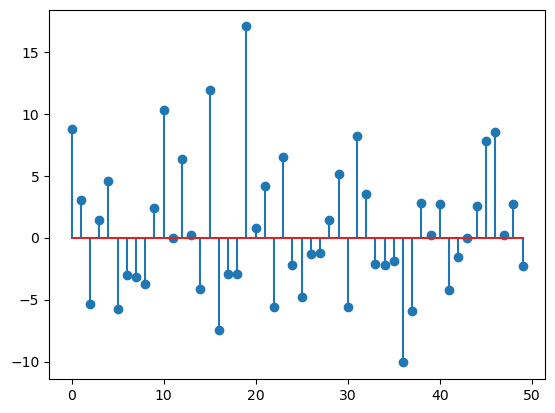

In [35]:
A = 4 # Cosine's amplitude
noise_power = 25 # Power for the noise
f = 2 # Cosine's frequency
Fs = 20 # "Sampling" frequency
W = 2*np.pi*f/Fs

n = np.arange(4000)
# Periodic signal
x = A*np.cos(W*n)
# Noise
z = np.sqrt(noise_power)*randn(len(x))

y = x+z
# Observe a window of the signal
plt.stem(y[:50])



We can see that the contaminated signal looks mostly like noise, being it difficult to point that the original, now lets take a look at its autocorrelation function

<StemContainer object of 3 artists>

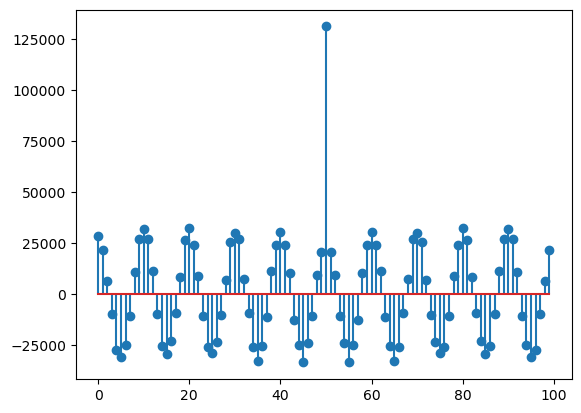

In [36]:
Ry = np.correlate(y,y,mode='full')
# Observe a window of Ry, taking into account the negative indexes
l_boundary = len(Ry)//2 - 50
r_boundary = len(Ry)//2 + 50
plt.stem(Ry[l_boundary:r_boundary])

Now it becomes clear that our original signal was periodic, since its correlation is as well periodic, and the white noise contributes only to the huge spike resembling an impulse at the origin.

## Cross-correlation for synchronization of signals
Imagine a signal $x[n]$ is transmitted through a channel, becoming a delayed and distorted version $y[n]$. In order to find out what was the delay $x[n]$ experienced, the cross-correlation can be employed. If a part of x[n] is known, the cross-correlation can be employed to find its best match in $y[n]$. Modern modulation schemes employ more complicated sequences and techniques, but these are still based on the correlation.

-3
[1 2 3]
[3 2 1 1 2 3]
[ 3.  8. 14.  9.  7. 10. 12.  9.  0.  0.  0.]


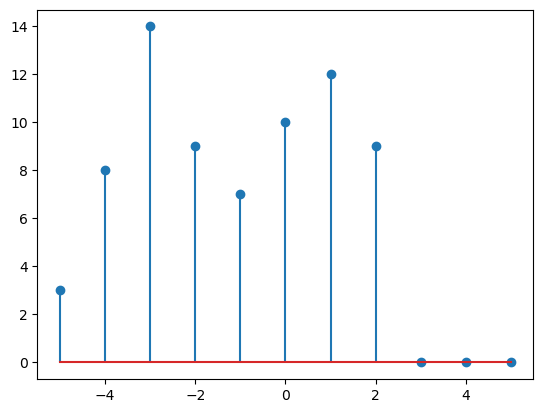

In [47]:
x = np.arange(1,4)
x2 = np.concatenate((x, np.zeros(3)))
y = np.concatenate((np.flip(x),x))
c = np.correlate(x2,y,mode='full')
lags =np.arange(-len(x2) + 1, len(y))
plt.stem(lags,c)
L = lags[np.argmax(x)]
print(L)
print(x)
print(y)
print(c)